In [3]:
# ヘッダーのみを読み込んで列名を確認
df_header = pd.read_csv('ntt_stock_prices.csv', nrows=0)
print(df_header.columns.tolist())


['Price', 'Close', 'High', 'Low', 'Open', 'Volume']


In [4]:
import pandas as pd
# CSV読み込み。'Price' 列を日付として解析
df = pd.read_csv(
    'ntt_stock_prices.csv',
    parse_dates=['Price']
)

# 分かりやすいように列名を Date にリネーム
df.rename(columns={'Price': 'Date'}, inplace=True)

# 日付で昇順にソート
df_sorted = df.sort_values(by='Date')

# 最も古い5行
print("=== 最も古いデータ ===")
print(df_sorted.head(5))

# 最も新しい5行
print("\n=== 最新のデータ ===")
print(df_sorted.tail(5))

=== 最も古いデータ ===
         Date              Close               High                Low  \
2  2000-01-04   95.1213150024414  96.71552698572255  94.58991100801437   
3  2000-01-05   91.4014663696289  92.46427411811295  89.27585087266078   
4  2000-01-06   88.7444839477539  91.40150442523156  88.21307985225837   
5  2000-01-07  87.68164825439453  88.21305218320903  86.61884039676549   
6  2000-01-10  87.68164825439453  87.68164825439452  87.68164825439452   

                Open      Volume  
2   95.1213150024414  4600000000  
3   91.4014663696289  6225000000  
4   90.3386962342405  4375000000  
5  86.61884039676549  5550000000  
6  87.68164825439452           0  

=== 最新のデータ ===
            Date               Close                High                Low  \
6323  2025-04-23   150.3000030517578   151.1999969482422  149.8000030517578   
6324  2025-04-24  146.10000610351562  149.89999389648438  145.6999969482422   
6325  2025-04-25  147.60000610351562   148.6999969482422  146.8000030517578 

/tmp/ipykernel_265/464743232.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


In [5]:
# 各列の欠損値の数を表示
print(df.isnull().sum())
# 欠損値を含む行を表示
print(df[df.isnull().any(axis=1)])


Date      0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
   Date Close High  Low Open Volume
1  Date   NaN  NaN  NaN  NaN    NaN


In [6]:

# 日付列に想定外の文字列（"Date", "Ticker", など）が入っている行をすべて除外
df_clean = df[~df['Date'].isin(['Date', 'Ticker', None, ''])].copy()

# 日付型に変換（フォーマット指定あり）
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')

# 欠損が消えたか確認
print(df_clean.isnull().sum())
# 先頭5行と末尾5行を表示
print("----- 先頭5行 -----")
print(df_clean.head())

print("\n----- 末尾5行 -----")
print(df_clean.tail())


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
----- 先頭5行 -----
        Date              Close               High                Low  \
2 2000-01-04   95.1213150024414  96.71552698572255  94.58991100801437   
3 2000-01-05   91.4014663696289  92.46427411811295  89.27585087266078   
4 2000-01-06   88.7444839477539  91.40150442523156  88.21307985225837   
5 2000-01-07  87.68164825439453  88.21305218320903  86.61884039676549   
6 2000-01-10  87.68164825439453  87.68164825439452  87.68164825439452   

                Open      Volume  
2   95.1213150024414  4600000000  
3   91.4014663696289  6225000000  
4   90.3386962342405  4375000000  
5  86.61884039676549  5550000000  
6  87.68164825439452           0  

----- 末尾5行 -----
           Date               Close                High                 Low  \
6321 2025-04-21               148.5               150.0  148.10000610351562   
6322 2025-04-22  149.89999389648438               150.0               148

/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 26666 (\N{CJK UNIFIED IDEOGRAPH-682A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/2501235339.py:32: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from 

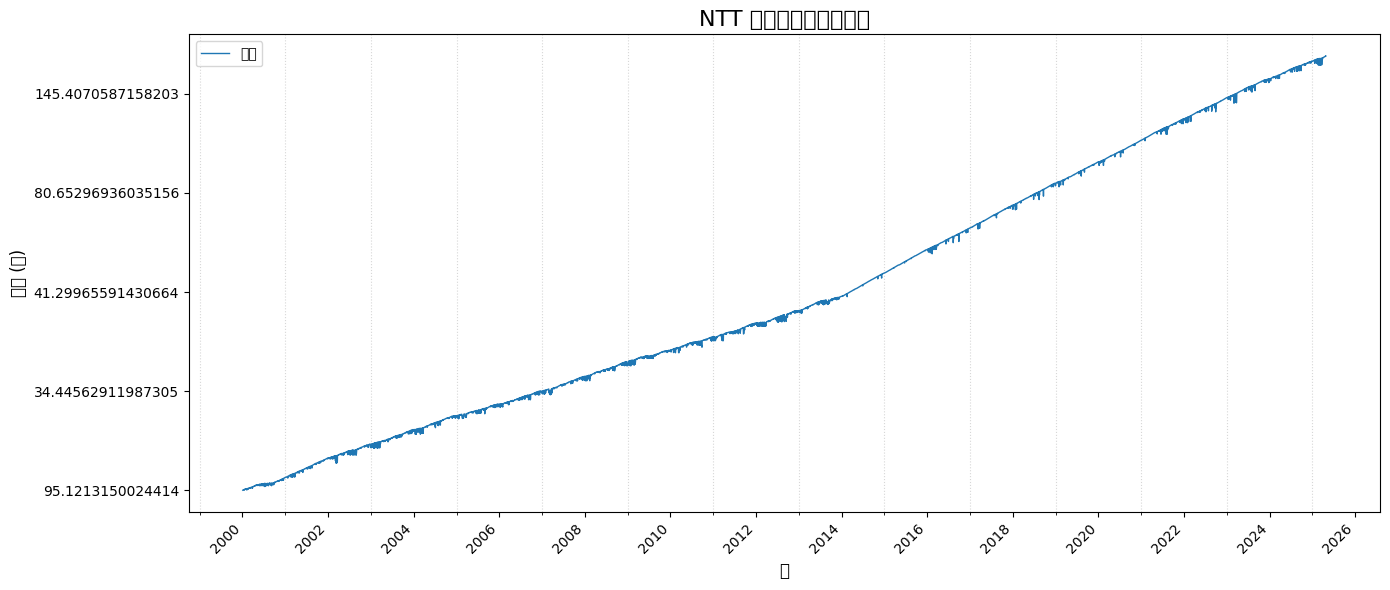

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


fig, ax = plt.subplots(figsize=(14, 6), facecolor='white')

# 折れ線
ax.plot(df_clean['Date'], df_clean['Close'], label='終値', linewidth=1)

# ─── X 軸：2年ごとに大目盛、1年ごとに補助目盛 ──────────────
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.grid(which='minor', linestyle=':', alpha=0.5)

# ─── Y 軸：目盛数を最大 6 本に制限 ───────────────────────
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='both'))

# ─── ラベル／タイトル／レイアウト ─────────────────────────
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)

ax.set_title('NTT 株価の推移（終値）', fontsize=16)
ax.set_xlabel('年', fontsize=12)
ax.set_ylabel('終値 (円)', fontsize=12)

ax.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 26666 (\N{CJK UNIFIED IDEOGRAPH-682A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_265/179840150.py:24: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s)

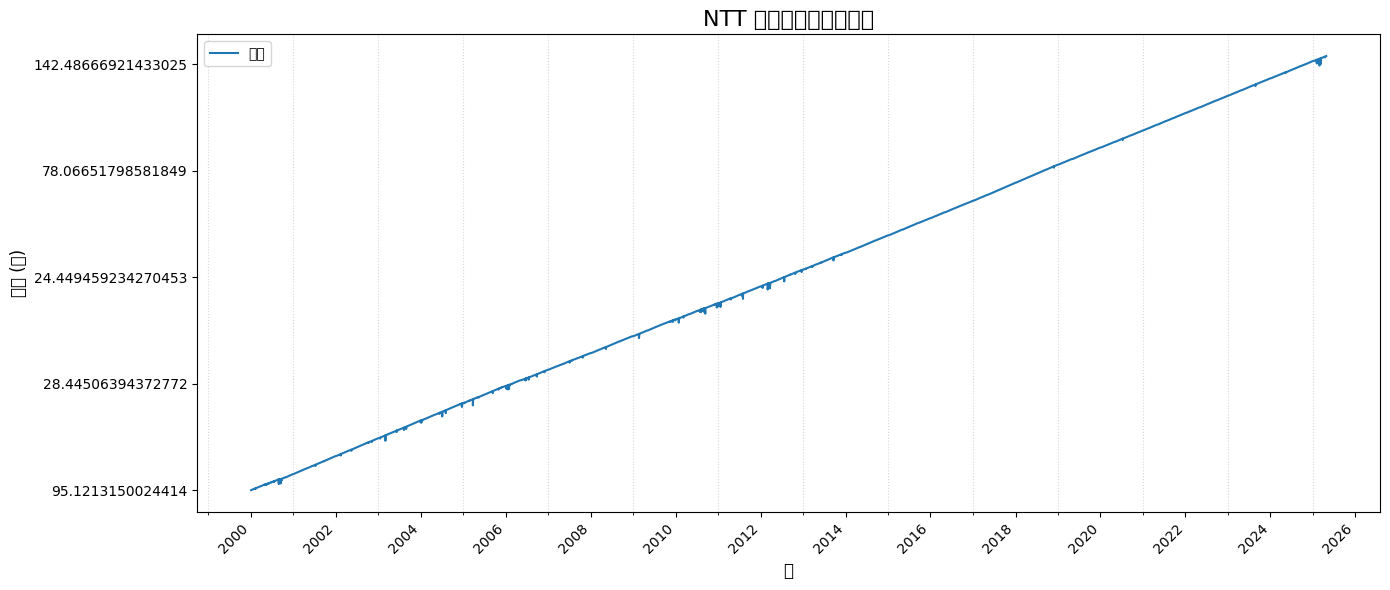

In [8]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor='white')

# 折れ線
ax.plot(df_clean['Date'], df_clean['Open'], label='始値')

# ─── X 軸：2年ごとに大目盛、1年ごとに補助目盛 ──────────────
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.grid(which='minor', linestyle=':', alpha=0.5)

# ─── Y 軸：目盛数を最大 6 本に制限 ───────────────────────
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='both'))

# ─── ラベル／タイトル／レイアウト ─────────────────────────
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)

ax.set_title('NTT 株価の推移（始値）', fontsize=16)
ax.set_xlabel('年', fontsize=12)
ax.set_ylabel('始値 (円)', fontsize=12)

ax.legend()
plt.tight_layout()
plt.show()


In [9]:
# 0. Open/Close を数値型に変換
df_clean['Open']  = pd.to_numeric(df_clean['Open'], errors='coerce')
df_clean['Close'] = pd.to_numeric(df_clean['Close'], errors='coerce')

# 数値変換に失敗して NaN になった行を削除
df_clean = df_clean.dropna(subset=['Open', 'Close'])

# 1. 期間（年数）の計算
start_date   = df_clean['Date'].min()
end_date     = df_clean['Date'].max()
period_years = (end_date - start_date).days / 365.25

# 2. 初期値・終了値の取得
start_open  = df_clean.loc[df_clean['Date'] == start_date,  'Open'].iloc[0]
end_open    = df_clean.loc[df_clean['Date'] == end_date,    'Open'].iloc[0]
start_close = df_clean.loc[df_clean['Date'] == start_date,  'Close'].iloc[0]
end_close   = df_clean.loc[df_clean['Date'] == end_date,    'Close'].iloc[0]

# 3. CAGR の計算
cagr_open  = (end_open  / start_open ) ** (1/period_years) - 1
cagr_close = (end_close / start_close) ** (1/period_years) - 1

# 4. 結果表示
print(f"期間：{start_date.date()} 〜 {end_date.date()}（約{period_years:.2f}年）\n")
print(f"始値（Open）の年平均増加率（CAGR）：{cagr_open*100:.2f}%")
print(f"終値（Close）の年平均増加率（CAGR）：{cagr_close*100:.2f}%")

期間：2000-01-04 〜 2025-04-25（約25.31年）

始値（Open）の年平均増加率（CAGR）：1.74%
終値（Close）の年平均増加率（CAGR）：1.75%


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# データ準備
df = df_clean.copy()
df['Return_1d'] = df['Close'].pct_change()
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Volatility'] = df['Close'].rolling(window=5).std()

# ラベル（1ヶ月後に上昇しているか？）
df['Target'] = (df['Close'].shift(-20) > df['Close']).astype(int)

# 欠損除去
df.dropna(inplace=True)

# 特徴量とラベルの定義
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return_1d', 'MA_5', 'MA_20', 'Volatility']
X = df[features]
y = df['Target']

# 学習/テスト分割（シャッフルなし）
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# モデル構築・学習
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 予測と評価
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.91      0.58       541
           1       0.58      0.09      0.16       720

    accuracy                           0.44      1261
   macro avg       0.51      0.50      0.37      1261
weighted avg       0.52      0.44      0.34      1261



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ----------------------------------------------------------------------------
# 1. CSV からデータ読み込み（/root/ntt_stock_prices.csv）
# ----------------------------------------------------------------------------
csv_path = '/root/ntt_stock_prices.csv'
# 'Price' 列が日付、その他が Open, High, Low, Close, Volume

df = pd.read_csv(csv_path)
# 日付列を datetime に変換
if 'Price' in df.columns:
    df.rename(columns={'Price': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')  # フォーマット指定で高速・安全な変換

# 必要列の確認
expected_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns in CSV: {missing}")

# 数値列の型を保証
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 日付 NaT や数値 NaN を含む行を削除
df.dropna(subset=['Date'] + numeric_cols, inplace=True)

df.sort_values('Date', inplace=True)

# ----------------------------------------------------------------------------
# 2. 特徴量エンジニアリング
# ----------------------------------------------------------------------------
# 日次・1ヶ月・当日内の変化率
df['Return_1d'] = df['Close'].pct_change()
df['Return_20d'] = df['Close'].pct_change(periods=20)
df['Close_Open_Ratio'] = df['Close'] / df['Open'] - 1
df['High_Low_Ratio'] = df['High'] / df['Low'] - 1

# 移動平均とその差、ボラティリティ
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA_diff'] = df['MA5'] - df['MA20']
df['Volatility'] = df['Close'].rolling(window=5).std()

# 特徴量 NaN 行を削除
df.dropna(inplace=True)

# ----------------------------------------------------------------------------
# 3. ラベル作成（1ヶ月後トレンド分類）
# ----------------------------------------------------------------------------
# 20取引日後に終値が上昇していれば1、下落or同値なら0
df['Target'] = (df['Close'].shift(-20) > df['Close']).astype(int)
# ラベル NaN 行を削除
df.dropna(subset=['Target'], inplace=True)

# ----------------------------------------------------------------------------
# 4. 学習データ準備
# ----------------------------------------------------------------------------
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Return_1d', 'Return_20d',
    'Close_Open_Ratio', 'High_Low_Ratio',
    'MA5', 'MA20', 'MA_diff', 'Volatility'
]
X = df[features]
y = df['Target']

# ----------------------------------------------------------------------------
# 5. モデル構築・ハイパーパラ探索・評価
# ----------------------------------------------------------------------------
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'class_weight': ['balanced']
}
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=tscv, scoring='f1', n_jobs=-1)
grid.fit(X, y)
print("Best params:", grid.best_params_)

# 時系列分割でトレーニング/テスト分割
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

best_model = grid.best_estimator_

# 最終評価

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

Buy & Hold Total Return: 75.04%
Strategy Total Return: 111.78%
Strategy Annualized Sharpe Ratio: 0.99


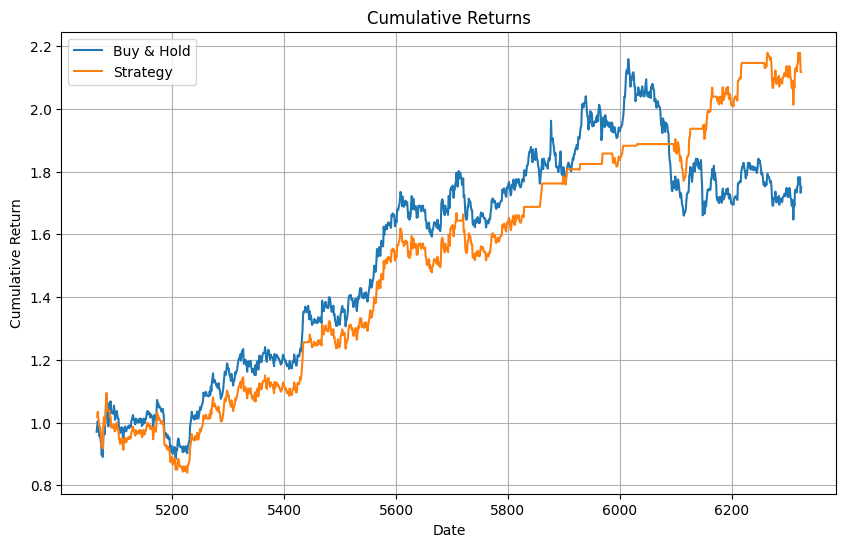

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# テスト期間のデータフレーム
df_test = df.iloc[split_idx:].copy()

# モデル予測確率とシグナル
df_test['pred_proba'] = best_model.predict_proba(X_test)[:, 1]

# シグナルを0.5閾値で二値化（調整可能）
threshold = 0.5
df_test['signal'] = (df_test['pred_proba'] > threshold).astype(int)

# 日次リターン（翌日終値/当日終値 - 1）
# 注意: 最終行はターゲット生成でshift(-20)しているため、戻りはdf_test['Close'].pct_change().shift(-1)
df_test['daily_return'] = df_test['Close'].pct_change().shift(-1)

# 戦略リターン: 前日のシグナルを使って当日のリターンを取得
# signal=1ならロング、0ならキャッシュ
df_test['strategy_return'] = df_test['signal'].shift(1) * df_test['daily_return']

# 累積リターンの計算
df_test['cum_return_buy_and_hold'] = (1 + df_test['daily_return']).cumprod()
df_test['cum_return_strategy'] = (1 + df_test['strategy_return']).cumprod()

# パフォーマンス指標
total_return_bh = df_test['cum_return_buy_and_hold'].iloc[-2] - 1
total_return_strat = df_test['cum_return_strategy'].iloc[-2] - 1

sharpe_strat = (df_test['strategy_return'].mean() / df_test['strategy_return'].std()) * np.sqrt(252)

print(f"Buy & Hold Total Return: {total_return_bh:.2%}")
print(f"Strategy Total Return: {total_return_strat:.2%}")
print(f"Strategy Annualized Sharpe Ratio: {sharpe_strat:.2f}")

# ----------------------------------------------------------------------------
# 7. 可視化
# ----------------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(df_test.index, df_test['cum_return_buy_and_hold'], label='Buy & Hold')
plt.plot(df_test.index, df_test['cum_return_strategy'], label='Strategy')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
